In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
orig=pd.read_csv("D://Data Science/Assignments/5-MultiLinear Regression/50_Startups.csv")

In [145]:
orig.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [124]:
#Convert the column into categorical columns& Take care Dummy Variable Trap
state=pd.get_dummies(orig['State'],drop_first=True)

In [126]:
# Drop the state coulmn
orig=orig.drop('State',axis=1)

In [143]:
orig.head()

,rnd,admin,mkt,profit,state1,state2
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


ERROR! Session/line number was not unique in database. History logging moved to new session 178


In [127]:
# concat the dummy variables
orig=pd.concat([orig,state],axis=1)
orig

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [130]:
#rename the columns
orig.columns=['rnd','admin','mkt','profit','state1','state2']
orig.head()

,rnd,admin,mkt,profit,state1,state2
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


Check for NA values

In [131]:
#check for missing values
orig.isna().sum()

rnd       0
admin     0
mkt       0
profit    0
state1    0
state2    0
dtype: int64

In [132]:
corr=orig.corr()
corr

,rnd,admin,mkt,profit,state1,state2
rnd,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
admin,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
mkt,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
state1,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
state2,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


profit vs rnd having high corr
profit vs marketting also reasonably good corr
remaining other variables are having less relations with profit
marketting and rnd having good corr among independant variables

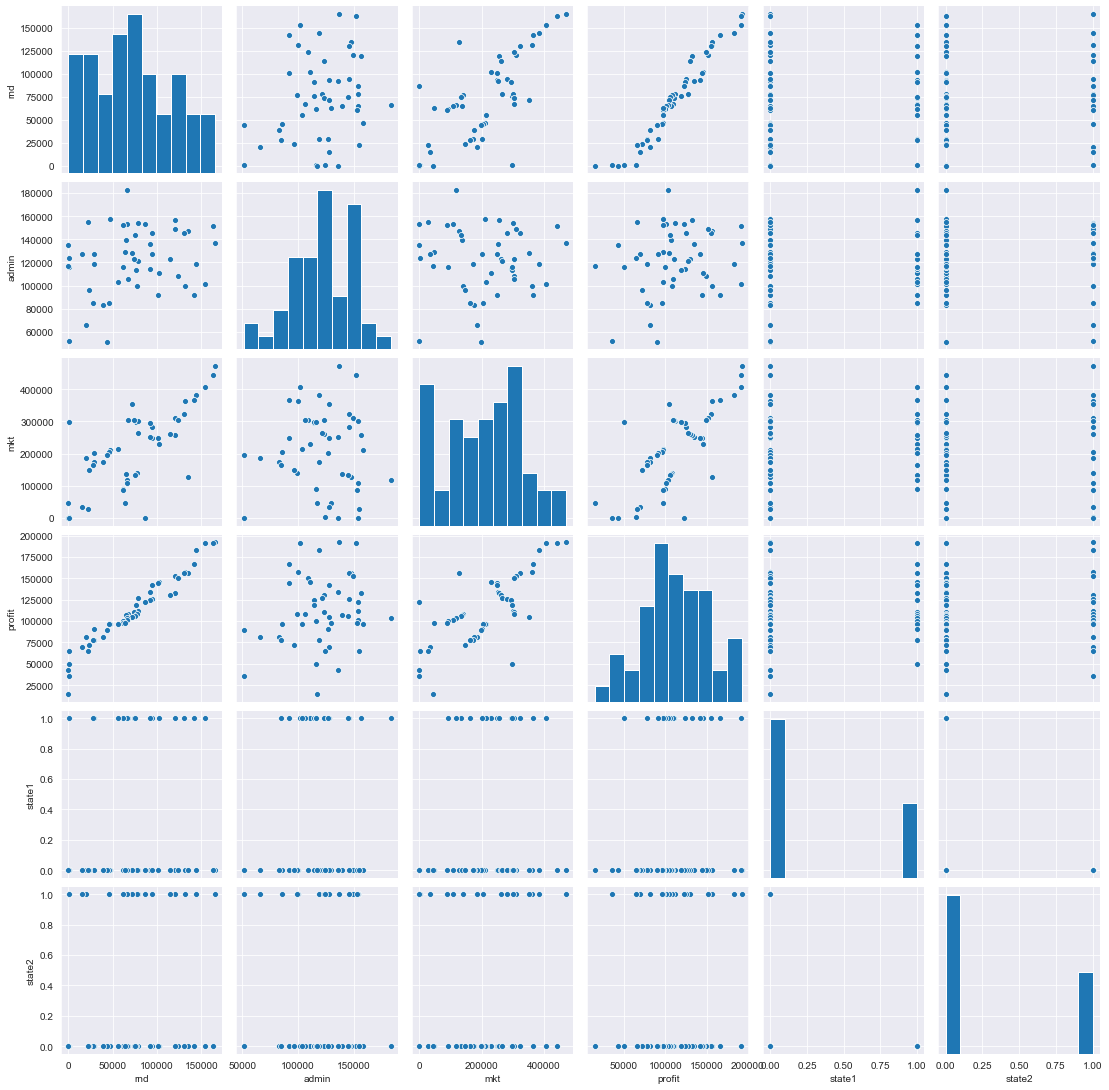

In [133]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(orig)

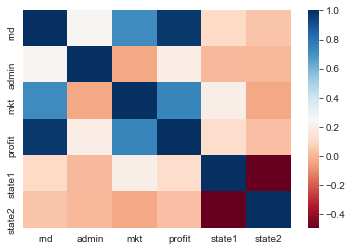

In [134]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, 
            cmap='RdBu')

In [135]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rnd     50 non-null     float64
 1   admin   50 non-null     float64
 2   mkt     50 non-null     float64
 3   profit  50 non-null     float64
 4   state1  50 non-null     uint8  
 5   state2  50 non-null     uint8  
dtypes: float64(4), uint8(2)
memory usage: 1.8 KB


In [136]:
X = orig.iloc[:, [0,1,2,4,5]].values 
y = orig.iloc[:, 3].values

In [137]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [138]:
#Build model
import statsmodels.formula.api as smf 

In [139]:
model1=smf.ols('profit~rnd+admin+mkt+state1+state2', data=orig).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.34e-27
Time:                        19:23:07   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
rnd            0.8060      0.046     17.369      0.000       0.712       0.900
admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
mkt            0.0270      0.017      1.574      0.123      -0.008       0.062
state1       198.7888   3371.007      0.059      0.953   -6595.030    6992.607
state2       -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p value for state2 is having greater value
lets remove and rebuild model

In [93]:
model2=smf.ols('profit~rnd+admin+mkt+state1', data=orig).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           8.49e-29
Time:                        18:28:53   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
rnd            0.8060      0.046     17.606      0.000       0.714       0.898
admin         -0.0270      0.052     -0.523      0.604      -0.131       0.077
mkt            0.0270      0.017      1.592      0.118      -0.007       0.061
state1       220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
model3=smf.ols('profit~rnd+admin+mkt', data=orig).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           4.53e-30
Time:                        18:29:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rnd            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
mkt            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
model4=smf.ols('profit~rnd+mkt', data=orig).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           2.16e-31
Time:                        18:29:53   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rnd            0.7966      0.041     19.266      0.000       0.713       0.880
mkt            0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
model5=smf.ols('profit~rnd', data=orig).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           3.50e-32
Time:                        19:25:14   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rnd            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ERROR! Session/line number was not unique in database. History logging moved to new session 176


In [162]:
#New data for prediction
y1=pd.DataFrame({'rnd':165349.20,'admin':136897.80,'mkt':471784.10,'state1':0,'state2':1},index=[1])
#192261.83
y1=pd.DataFrame({'rnd':165349.20,'admin':136897.80,'mkt':471784.10,'state1':0,'state2':1},index=[1])
y

192261.83

In [163]:
model5.predict(X)

1    190289.293893
dtype: float64